In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.0954 - accuracy: 3.8000e-04 - val_loss: 0.0496 - val_accuracy: 2.0000e-04
Epoch 2/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.0512 - accuracy: 5.6000e-04 - val_loss: 0.0497 - val_accuracy: 5.0000e-04
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.0515 - accuracy: 5.2000e-04 - val_loss: 0.0515 - val_accuracy: 6.0000e-04
Epoch 4/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.0506 - accuracy: 6.0000e-04 - val_loss: 0.0511 - val_accuracy: 2.0000e-04
Epoch 5/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.0510 - accuracy: 5.6000e-04 - val_loss: 0.0525 - val_accuracy: 3.0000e-04
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.0511 - accuracy: 4.2000e-04 - val_loss: 0.0508 - val_accuracy: 4.0000e-04
Epoch 7/

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RTADM.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 7


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
77,3,cat,3.385419,0.304496,0.529466,3.462037,1.820111,0.000000,4.379885,1.514909,...,0.000000,3.294977,0.000000,0.092956,0.000000,0.000000,0.856945,0.000000,1.000000,5.960464e-08
1053,3,cat,4.382403,0.515614,0.797915,4.579738,2.329495,0.000000,5.680582,1.889757,...,0.000000,4.401857,0.000000,0.061899,0.000000,0.000000,1.088630,0.000000,0.999645,3.550053e-04
8718,7,horse,3.071729,0.230717,0.543552,3.201981,1.599291,0.000000,3.999499,1.381549,...,0.000000,3.075452,0.000000,0.084543,0.000000,0.000000,0.835369,0.000000,0.999525,4.751086e-04
5682,5,dog,3.204976,0.414504,0.567473,3.163356,1.661232,0.000000,4.185994,1.264713,...,0.000000,3.110029,0.000000,0.161369,0.000000,0.000000,0.771437,0.000000,0.999512,4.882216e-04
3285,1,automobile,3.066683,0.340857,0.661635,3.245608,1.548318,0.000000,3.942912,1.296623,...,0.000000,3.104935,0.000000,0.071453,0.000000,0.000000,0.808818,0.000000,0.999343,6.573796e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,1,automobile,0.103841,0.000000,0.000000,2.436187,0.173261,1.501542,6.268579,7.739754,...,0.000000,1.912689,2.628673,0.011685,2.870598,6.086176,7.652435,0.000000,0.495074,5.049262e-01
7639,9,truck,0.362646,0.000000,0.000000,1.541664,0.335675,0.890232,3.778832,4.951208,...,0.000000,1.146426,1.589589,0.000000,1.769606,3.583504,4.900161,0.000000,0.495063,5.049373e-01
9765,4,deer,0.000000,0.000000,0.000000,0.800159,0.000000,0.097996,0.000000,0.323054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.515603,0.203223,0.145211,0.489951,5.100491e-01
7536,8,ship,0.512275,0.000000,0.000000,1.718741,1.430435,0.906843,5.408228,6.005908,...,0.542087,1.839333,2.698091,0.000000,2.665756,4.529274,6.222166,0.000000,0.484221,5.157788e-01


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

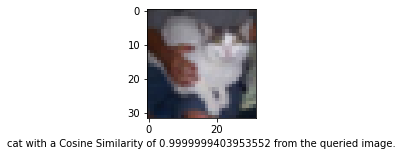

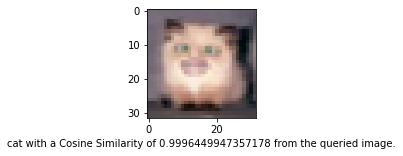

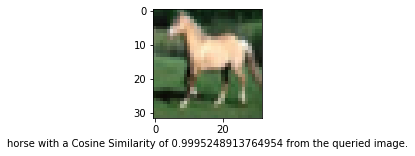

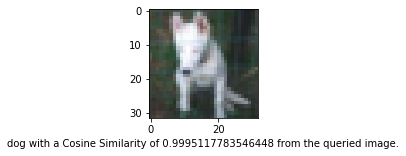

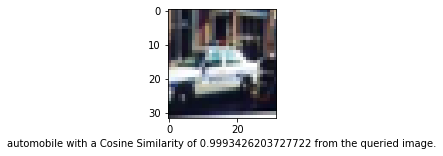

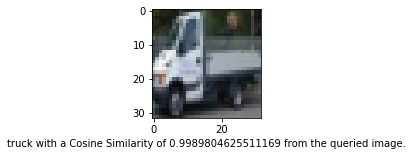

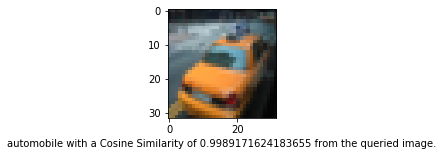

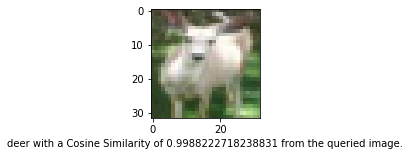

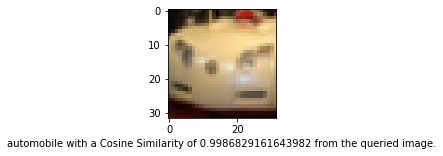

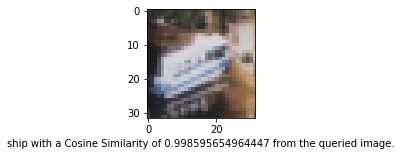

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
77,3,cat,3.385419,0.304496,0.529466,3.462037,1.820111,0.000000,4.379885,1.514909,...,3.294977,0.000000,0.092956,0.000000,0.000000,0.856945,0.0,1.000000,5.960464e-08,0.000000
4817,0,airplane,3.395479,0.425432,0.500986,3.350596,2.033158,0.000000,4.311693,1.538332,...,3.127633,0.000000,0.079047,0.000000,0.000000,0.727861,0.0,0.997722,2.278030e-03,0.691136
5682,5,dog,3.204976,0.414504,0.567473,3.163356,1.661232,0.000000,4.185994,1.264713,...,3.110029,0.000000,0.161369,0.000000,0.000000,0.771437,0.0,0.999512,4.882216e-04,0.697544
4142,8,ship,3.263605,0.203410,0.335461,3.352183,1.880054,0.000000,4.330772,1.959179,...,3.285890,0.000000,0.000000,0.000000,0.000000,1.236298,0.0,0.997265,2.735376e-03,0.736378
9673,9,truck,3.169339,0.190515,0.498829,3.482248,1.658646,0.000000,4.288519,1.773623,...,3.319807,0.000000,0.000000,0.000000,0.000000,1.126293,0.0,0.996959,3.041387e-03,0.775810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,8,ship,3.889002,0.000000,0.000000,7.305998,2.157790,0.225762,12.329093,13.238092,...,6.309553,0.613291,0.000000,0.409408,2.860798,11.659328,0.0,0.785496,2.145038e-01,20.017979
9921,0,airplane,4.059005,0.000000,0.000000,7.413748,1.639313,0.000000,12.336220,12.559271,...,6.838443,0.000000,0.000000,0.000000,1.986477,11.533740,0.0,0.809207,1.907931e-01,20.166400
9848,2,bird,4.012138,0.000000,0.000000,7.452847,2.061376,0.188503,12.355644,13.182446,...,6.509463,0.083431,0.000000,0.055527,2.524440,11.778317,0.0,0.793530,2.064703e-01,20.242908
1078,0,airplane,3.770070,0.000000,0.000000,7.478410,2.369527,0.529450,12.515453,13.861215,...,6.145847,1.051660,0.000000,0.646944,3.239271,12.153884,0.0,0.773915,2.260849e-01,20.789175


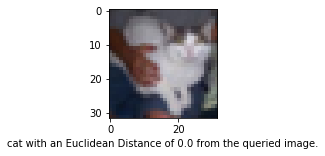

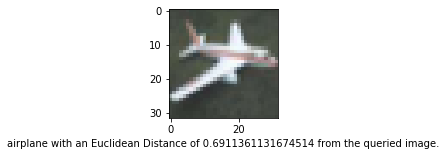

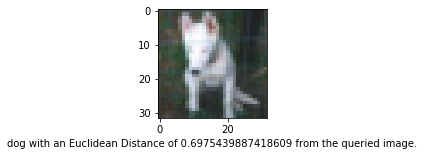

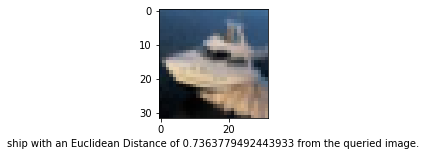

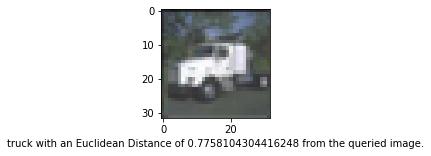

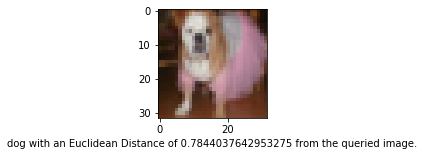

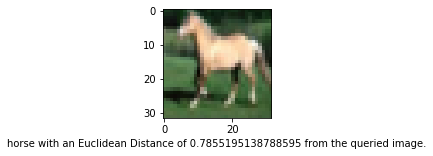

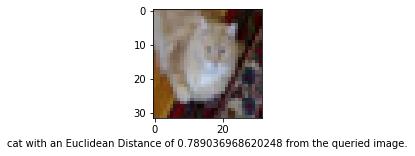

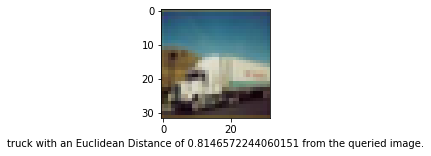

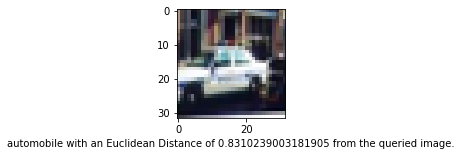

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()